In [2]:
import seaborn as sns
import torch
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

In [3]:
task_specific_scores = torch.load("../results/expert_task_specific_score.pt")
wanda_dict = torch.load("../results/expert_wanda_score.pt")
wanda_scores = torch.zeros_like(task_specific_scores)
for layer in range(32):
    for expert in range(8):
        wanda_scores[layer][expert] = wanda_dict[f"model.layers.{layer}.block_sparse_moe.experts.{expert}"]
massive_routing = torch.load("../results/mass-routing-count-top2-5000.pt")
frequency = torch.load("../results/routing-count.pt")

# normalize to [0, 1]
task_specific_scores = (task_specific_scores - task_specific_scores.min()) / (
            task_specific_scores.max() - task_specific_scores.min())
wanda_scores = (wanda_scores - wanda_scores.min()) / (wanda_scores.max() - wanda_scores.min())
massive_routing = (massive_routing - massive_routing.min()) / (massive_routing.max() - massive_routing.min())
frequency = frequency / frequency.sum(-1, True)

In [5]:
layer_top_k = torch.topk(frequency, dim=-1, k=2).indices
layer_top_k_experts = []
for i, layer_experts in enumerate(layer_top_k):
    for exp in layer_experts:
        layer_top_k_experts.append(f"exp_l{i}e{exp}_4")
".".join(layer_top_k_experts)

'exp_l0e5_4.exp_l0e2_4.exp_l1e4_4.exp_l1e3_4.exp_l2e0_4.exp_l2e1_4.exp_l3e2_4.exp_l3e5_4.exp_l4e3_4.exp_l4e2_4.exp_l5e1_4.exp_l5e2_4.exp_l6e5_4.exp_l6e0_4.exp_l7e5_4.exp_l7e6_4.exp_l8e5_4.exp_l8e0_4.exp_l9e0_4.exp_l9e3_4.exp_l10e1_4.exp_l10e2_4.exp_l11e1_4.exp_l11e4_4.exp_l12e1_4.exp_l12e2_4.exp_l13e7_4.exp_l13e4_4.exp_l14e4_4.exp_l14e5_4.exp_l15e1_4.exp_l15e2_4.exp_l16e7_4.exp_l16e6_4.exp_l17e2_4.exp_l17e5_4.exp_l18e0_4.exp_l18e2_4.exp_l19e0_4.exp_l19e4_4.exp_l20e6_4.exp_l20e7_4.exp_l21e6_4.exp_l21e3_4.exp_l22e0_4.exp_l22e3_4.exp_l23e1_4.exp_l23e0_4.exp_l24e2_4.exp_l24e1_4.exp_l25e1_4.exp_l25e5_4.exp_l26e3_4.exp_l26e2_4.exp_l27e5_4.exp_l27e0_4.exp_l28e1_4.exp_l28e3_4.exp_l29e2_4.exp_l29e6_4.exp_l30e7_4.exp_l30e4_4.exp_l31e7_4.exp_l31e3_4'

In [73]:
frequency_top_experts = []
for i, flat_idx in enumerate(frequency.flatten().sort(descending=True)[1]):
    frequency_top_experts.append(f"exp_l{flat_idx // 8}e{flat_idx % 8}")
"_4.".join(frequency_top_experts[:126])

'exp_l0e5_4.exp_l12e1_4.exp_l14e4_4.exp_l24e2_4.exp_l6e5_4.exp_l23e1_4.exp_l2e0_4.exp_l8e5_4.exp_l11e1_4.exp_l8e0_4.exp_l1e4_4.exp_l10e1_4.exp_l12e2_4.exp_l14e5_4.exp_l20e6_4.exp_l4e3_4.exp_l17e2_4.exp_l11e4_4.exp_l12e0_4.exp_l16e7_4.exp_l1e3_4.exp_l31e7_4.exp_l29e2_4.exp_l9e0_4.exp_l11e2_4.exp_l10e2_4.exp_l5e1_4.exp_l14e3_4.exp_l7e5_4.exp_l23e0_4.exp_l15e1_4.exp_l10e0_4.exp_l22e0_4.exp_l13e7_4.exp_l2e1_4.exp_l31e3_4.exp_l28e1_4.exp_l4e2_4.exp_l10e3_4.exp_l23e6_4.exp_l15e2_4.exp_l17e5_4.exp_l21e6_4.exp_l19e0_4.exp_l30e7_4.exp_l30e4_4.exp_l28e3_4.exp_l9e3_4.exp_l3e2_4.exp_l12e3_4.exp_l15e0_4.exp_l15e7_4.exp_l16e6_4.exp_l7e6_4.exp_l25e1_4.exp_l11e0_4.exp_l18e0_4.exp_l12e5_4.exp_l17e7_4.exp_l22e3_4.exp_l30e2_4.exp_l0e2_4.exp_l27e5_4.exp_l19e4_4.exp_l11e5_4.exp_l5e2_4.exp_l26e3_4.exp_l25e5_4.exp_l17e1_4.exp_l25e4_4.exp_l3e5_4.exp_l14e1_4.exp_l24e1_4.exp_l21e3_4.exp_l26e2_4.exp_l4e7_4.exp_l9e6_4.exp_l9e5_4.exp_l6e0_4.exp_l21e0_4.exp_l31e2_4.exp_l6e7_4.exp_l10e7_4.exp_l0e7_4.exp_l3e6_4.exp_l

In [74]:
task_specific_top_experts = []
for i, flat_idx in enumerate(task_specific_scores.flatten().sort(descending=True)[1]):
    task_specific_top_experts.append(f"exp_l{flat_idx // 8}e{flat_idx % 8}")
"_4.".join(task_specific_top_experts[:126])

'exp_l30e7_4.exp_l31e3_4.exp_l31e1_4.exp_l29e7_4.exp_l28e4_4.exp_l8e0_4.exp_l23e1_4.exp_l27e2_4.exp_l2e0_4.exp_l24e1_4.exp_l12e0_4.exp_l6e5_4.exp_l26e4_4.exp_l12e1_4.exp_l11e1_4.exp_l21e0_4.exp_l17e1_4.exp_l31e7_4.exp_l20e6_4.exp_l29e6_4.exp_l15e2_4.exp_l31e2_4.exp_l0e5_4.exp_l19e0_4.exp_l0e2_4.exp_l11e4_4.exp_l4e3_4.exp_l18e2_4.exp_l16e3_4.exp_l26e3_4.exp_l3e2_4.exp_l16e7_4.exp_l24e2_4.exp_l17e5_4.exp_l10e1_4.exp_l23e0_4.exp_l2e1_4.exp_l13e4_4.exp_l1e4_4.exp_l16e6_4.exp_l27e5_4.exp_l14e5_4.exp_l4e2_4.exp_l20e2_4.exp_l27e0_4.exp_l25e4_4.exp_l29e2_4.exp_l14e4_4.exp_l15e1_4.exp_l9e3_4.exp_l21e3_4.exp_l10e2_4.exp_l17e0_4.exp_l19e4_4.exp_l28e7_4.exp_l14e1_4.exp_l10e0_4.exp_l22e0_4.exp_l9e0_4.exp_l17e2_4.exp_l12e2_4.exp_l13e7_4.exp_l5e0_4.exp_l23e6_4.exp_l15e7_4.exp_l30e1_4.exp_l20e7_4.exp_l8e5_4.exp_l25e3_4.exp_l26e1_4.exp_l11e5_4.exp_l14e3_4.exp_l6e2_4.exp_l7e6_4.exp_l21e6_4.exp_l3e5_4.exp_l17e7_4.exp_l26e2_4.exp_l22e7_4.exp_l2e6_4.exp_l25e0_4.exp_l22e3_4.exp_l5e5_4.exp_l12e4_4.exp_l11e6_

In [75]:
wanda_top_experts = []
for i, flat_idx in enumerate(wanda_scores.flatten().sort(descending=True)[1]):
    wanda_top_experts.append(f"exp_l{flat_idx // 8}e{flat_idx % 8}")
"_4.".join(wanda_top_experts[:126])

'exp_l31e1_4.exp_l31e5_4.exp_l30e7_4.exp_l30e5_4.exp_l30e3_4.exp_l29e7_4.exp_l29e2_4.exp_l29e1_4.exp_l28e0_4.exp_l31e7_4.exp_l28e3_4.exp_l29e6_4.exp_l30e2_4.exp_l29e0_4.exp_l28e1_4.exp_l29e3_4.exp_l28e5_4.exp_l31e2_4.exp_l28e4_4.exp_l28e6_4.exp_l30e4_4.exp_l28e2_4.exp_l29e4_4.exp_l28e7_4.exp_l27e0_4.exp_l27e5_4.exp_l27e4_4.exp_l26e6_4.exp_l30e0_4.exp_l27e1_4.exp_l27e6_4.exp_l27e2_4.exp_l30e6_4.exp_l26e1_4.exp_l31e3_4.exp_l26e2_4.exp_l26e3_4.exp_l27e3_4.exp_l25e5_4.exp_l27e7_4.exp_l30e1_4.exp_l26e4_4.exp_l29e5_4.exp_l25e4_4.exp_l26e0_4.exp_l26e7_4.exp_l25e3_4.exp_l25e1_4.exp_l23e1_4.exp_l31e0_4.exp_l24e2_4.exp_l24e1_4.exp_l25e7_4.exp_l25e2_4.exp_l24e6_4.exp_l25e0_4.exp_l25e6_4.exp_l24e5_4.exp_l26e5_4.exp_l24e4_4.exp_l31e6_4.exp_l31e4_4.exp_l23e0_4.exp_l23e6_4.exp_l24e3_4.exp_l24e0_4.exp_l23e7_4.exp_l24e7_4.exp_l22e3_4.exp_l22e0_4.exp_l23e2_4.exp_l22e7_4.exp_l23e4_4.exp_l22e5_4.exp_l21e3_4.exp_l21e6_4.exp_l23e3_4.exp_l21e0_4.exp_l22e2_4.exp_l22e4_4.exp_l21e7_4.exp_l22e1_4.exp_l22e6_4.exp

In [78]:
mass_top_experts = []
for i, flat_idx in enumerate(massive_routing.flatten().sort(descending=True)[1]):
    mass_top_experts.append(f"exp_l{flat_idx // 8}e{flat_idx % 8}")
"_4.".join(mass_top_experts[:126])

'exp_l19e6_4.exp_l23e3_4.exp_l27e4_4.exp_l23e1_4.exp_l15e3_4.exp_l15e7_4.exp_l16e0_4.exp_l11e5_4.exp_l9e7_4.exp_l6e4_4.exp_l1e3_4.exp_l28e2_4.exp_l27e1_4.exp_l22e3_4.exp_l16e3_4.exp_l18e0_4.exp_l20e3_4.exp_l11e3_4.exp_l18e7_4.exp_l13e0_4.exp_l21e6_4.exp_l17e6_4.exp_l14e2_4.exp_l10e4_4.exp_l4e5_4.exp_l5e6_4.exp_l2e0_4.exp_l3e4_4.exp_l25e7_4.exp_l12e6_4.exp_l14e6_4.exp_l26e0_4.exp_l24e2_4.exp_l12e2_4.exp_l24e7_4.exp_l13e4_4.exp_l21e7_4.exp_l26e7_4.exp_l25e2_4.exp_l17e4_4.exp_l20e6_4.exp_l10e2_4.exp_l9e3_4.exp_l8e1_4.exp_l6e1_4.exp_l7e2_4.exp_l5e0_4.exp_l3e5_4.exp_l8e6_4.exp_l7e0_4.exp_l4e4_4.exp_l28e5_4.exp_l2e2_4.exp_l29e3_4.exp_l19e7_4.exp_l21e0_4.exp_l24e6_4.exp_l26e3_4.exp_l25e6_4.exp_l22e1_4.exp_l26e4_4.exp_l21e2_4.exp_l25e1_4.exp_l20e0_4.exp_l2e7_4.exp_l13e1_4.exp_l14e5_4.exp_l12e7_4.exp_l17e7_4.exp_l12e0_4.exp_l13e3_4.exp_l14e7_4.exp_l10e6_4.exp_l16e1_4.exp_l24e3_4.exp_l18e2_4.exp_l18e6_4.exp_l10e3_4.exp_l7e3_4.exp_l3e1_4.exp_l5e5_4.exp_l8e4_4.exp_l8e7_4.exp_l4e7_4.exp_l4e3_4.exp_

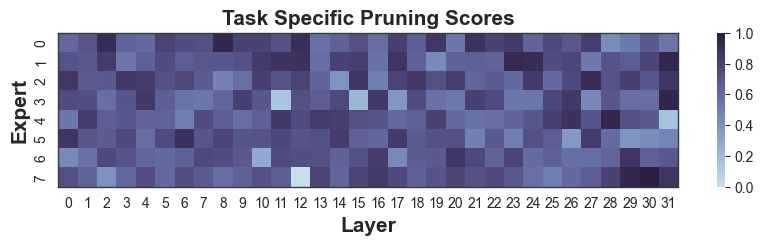

In [25]:
fontsize = 15
plt.figure(figsize=(10, 2))
ax = sns.heatmap(
    task_specific_scores.transpose(0, 1),
    cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    linewidth=0,
)

# set the colorbar labels to only one decimal place
title = f"Task Specific Pruning Scores"
ax.set_title(title, fontsize=fontsize, fontweight="bold")

ax.set_ylabel("Expert", fontsize=fontsize, fontweight="bold")
ax.set_xlabel("Layer", fontsize=fontsize, fontweight="bold")

# set legend to percentage
cbar = ax.collections[0].colorbar

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor("#343a40")

plt.show()

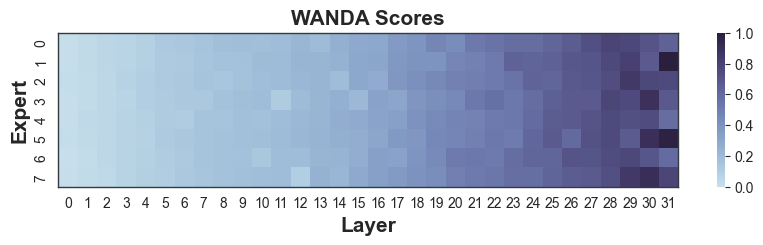

In [26]:
fontsize = 15
plt.figure(figsize=(10, 2))
ax = sns.heatmap(
    wanda_scores.transpose(0, 1),
    cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    linewidth=0,
)

# set the colorbar labels to only one decimal place
title = f"WANDA Scores"
ax.set_title(title, fontsize=fontsize, fontweight="bold")

ax.set_ylabel("Expert", fontsize=fontsize, fontweight="bold")
ax.set_xlabel("Layer", fontsize=fontsize, fontweight="bold")

# set legend to percentage
cbar = ax.collections[0].colorbar

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor("#343a40")

plt.show()

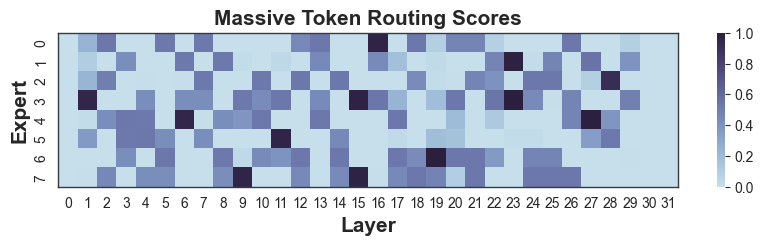

In [27]:
fontsize = 15
plt.figure(figsize=(10, 2))
ax = sns.heatmap(
    massive_routing.transpose(0, 1),
    cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True),
    linewidth=0,
)

# set the colorbar labels to only one decimal place
title = f"Massive Token Routing Scores"
ax.set_title(title, fontsize=fontsize, fontweight="bold")

ax.set_ylabel("Expert", fontsize=fontsize, fontweight="bold")
ax.set_xlabel("Layer", fontsize=fontsize, fontweight="bold")

# set legend to percentage
cbar = ax.collections[0].colorbar

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor("#343a40")

plt.show()

In [36]:
layer_score = [0.208984375, 0.1796875, 0.1611328125, 0.12109375, 0.1123046875, 0.04833984375, 0.03955078125,
               -0.0311279296875, -0.058349609375, -0.02880859375, -0.07568359375, -0.03857421875, -0.0947265625,
               -0.06396484375, 0.00089263916015625, 0.00531005859375, 0.046875, 0.0869140625, 0.1630859375, 0.16796875,
               0.1455078125, 0.10693359375, 0.09033203125, 0.0888671875, 0.06982421875, 0.06591796875, 0.0869140625,
               0.052490234375, 0.037841796875, -0.0419921875, -0.12890625, -0.2353515625]
layer_score = torch.tensor(layer_score)
layer_score_gt = torch.tensor([0.1962890625, 0.1767578125, 0.1689453125, 0.125, 0.11376953125, 0.054443359375, 0.052490234375, -0.0267333984375, -0.030029296875, -0.00885009765625, -0.03955078125, -0.01165771484375, -0.06982421875, -0.037353515625, 0.0279541015625, 0.0262451171875, 0.0556640625, 0.1240234375, 0.19140625, 0.197265625, 0.158203125, 0.1171875, 0.130859375, 0.1201171875, 0.107421875, 0.1005859375, 0.0810546875, 0.072265625, 0.06201171875, 0.018310546875, -0.109375, -0.181640625])

In [24]:
layer_max_weight = [0.353515625, 1.46875, 0.6171875, 0.65625, 0.6953125, 0.703125, 0.76171875, 0.6875, 0.80078125, 0.90625, 0.86328125, 0.98046875, 0.94140625, 0.82421875, 1.140625, 0.8515625, 0.80859375, 0.77734375, 0.7890625, 0.83203125, 0.83984375, 0.7890625, 0.78125, 0.77734375, 0.70703125, 0.7578125, 0.67578125, 0.87109375, 1.0234375, 1.203125, 1.328125, 1.5390625]

In [27]:
torch.tensor(layer_max_weight).argsort(descending=True)

tensor([31,  1, 30, 29, 14, 28, 11, 12,  9, 27, 10, 15, 20, 19, 13, 16,  8, 18,
        21, 22, 23, 17,  6, 25, 24,  5,  4,  7, 26,  3,  2,  0])

In [26]:
layer_score.argsort(descending=False)

tensor([31, 30, 12, 10, 13,  8, 29, 11,  7,  9, 14, 15, 28,  6, 16,  5, 27, 25,
        24, 26, 17, 23, 22, 21,  4,  3, 20,  2, 18, 19,  1,  0])

In [25]:
top_layers = layer_score.argsort(descending=False)[:16].tolist()
top_experts = [f"exp_l{layer}e{exp}_4" for layer in top_layers for exp in range(8)]
".".join(top_experts)

'exp_l31e0_4.exp_l31e1_4.exp_l31e2_4.exp_l31e3_4.exp_l31e4_4.exp_l31e5_4.exp_l31e6_4.exp_l31e7_4.exp_l30e0_4.exp_l30e1_4.exp_l30e2_4.exp_l30e3_4.exp_l30e4_4.exp_l30e5_4.exp_l30e6_4.exp_l30e7_4.exp_l12e0_4.exp_l12e1_4.exp_l12e2_4.exp_l12e3_4.exp_l12e4_4.exp_l12e5_4.exp_l12e6_4.exp_l12e7_4.exp_l10e0_4.exp_l10e1_4.exp_l10e2_4.exp_l10e3_4.exp_l10e4_4.exp_l10e5_4.exp_l10e6_4.exp_l10e7_4.exp_l13e0_4.exp_l13e1_4.exp_l13e2_4.exp_l13e3_4.exp_l13e4_4.exp_l13e5_4.exp_l13e6_4.exp_l13e7_4.exp_l8e0_4.exp_l8e1_4.exp_l8e2_4.exp_l8e3_4.exp_l8e4_4.exp_l8e5_4.exp_l8e6_4.exp_l8e7_4.exp_l29e0_4.exp_l29e1_4.exp_l29e2_4.exp_l29e3_4.exp_l29e4_4.exp_l29e5_4.exp_l29e6_4.exp_l29e7_4.exp_l11e0_4.exp_l11e1_4.exp_l11e2_4.exp_l11e3_4.exp_l11e4_4.exp_l11e5_4.exp_l11e6_4.exp_l11e7_4.exp_l7e0_4.exp_l7e1_4.exp_l7e2_4.exp_l7e3_4.exp_l7e4_4.exp_l7e5_4.exp_l7e6_4.exp_l7e7_4.exp_l9e0_4.exp_l9e1_4.exp_l9e2_4.exp_l9e3_4.exp_l9e4_4.exp_l9e5_4.exp_l9e6_4.exp_l9e7_4.exp_l14e0_4.exp_l14e1_4.exp_l14e2_4.exp_l14e3_4.exp_l14e4_4.exp

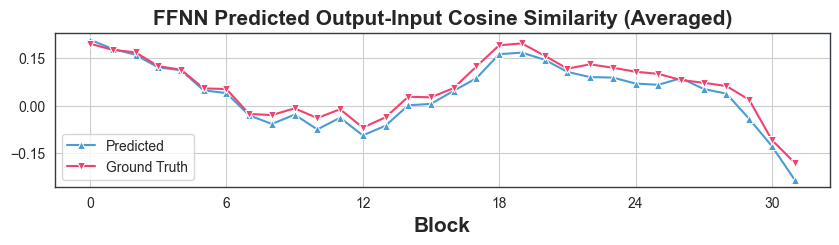

In [46]:
fontsize = 15
plt.figure(figsize=(10, 2))
_ = sns.lineplot(layer_score, marker="^", color="#4B9CD3", label="Predicted")
ax = sns.lineplot(layer_score_gt, marker="v", color="#EF426F", label="Ground Truth")

ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(6))

# set the colorbar labels to only one decimal place
title = f"FFNN Predicted Output-Input Cosine Similarity (Averaged)"
ax.set_title(title, fontsize=fontsize, fontweight="bold")

ax.set_ylabel("", fontsize=fontsize, fontweight="bold")
ax.set_xlabel("Block", fontsize=fontsize, fontweight="bold")

# set legend to percentage
cbar = ax.collections[0].colorbar

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor("#343a40")

plt.show()

In [52]:
residual_layer_score_gt = torch.tensor([0.8750, 0.9570, 0.9609, 0.9227, 0.9688, 0.9727, 0.9727, 0.9766, 0.9766, 0.9805, 0.9805, 0.9844, 0.9844, 0.9844, 0.9805, 0.9805, 0.9805, 0.9805, 0.9766, 0.9805, 0.9883, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9883, 0.9805, 0.9727, 0.9414, 0.7031])

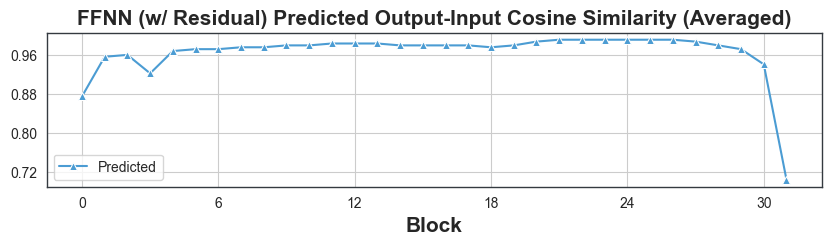

In [53]:
fontsize = 15
plt.figure(figsize=(10, 2))
ax = sns.lineplot(residual_layer_score_gt, marker="^", color="#4B9CD3", label="Predicted")
# _ = sns.lineplot(layer_score_gt, marker="v", color="#EF426F", label="Ground Truth")

ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_locator(plt.MaxNLocator(6))

# set the colorbar labels to only one decimal place
title = f"FFNN (w/ Residual) Predicted Output-Input Cosine Similarity (Averaged)"
ax.set_title(title, fontsize=fontsize, fontweight="bold")

ax.set_ylabel("", fontsize=fontsize, fontweight="bold")
ax.set_xlabel("Block", fontsize=fontsize, fontweight="bold")

# set legend to percentage
cbar = ax.collections[0].colorbar

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_edgecolor("#343a40")

plt.show()